In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import MultipleLocator
import gzip
import os
import time
import re
from curses.ascii import isdigit
import pandas as pd
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times",
    "font.size":18
})

In [ ]:

os.environ["PATH"]='/home/wu/anaconda3/bin:/home/wu/anaconda3/condabin:/usr/local/texlive/2022/bin/x86_64-linux:/home/wu/bin:/usr/local/bin:/home/wu/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin'

# plt.rcParams.update({
# "text.usetex": True,
# "font.family": "sans-serif",
# "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "text.usetex": False,
    # "font.family": "Helvetica"
})

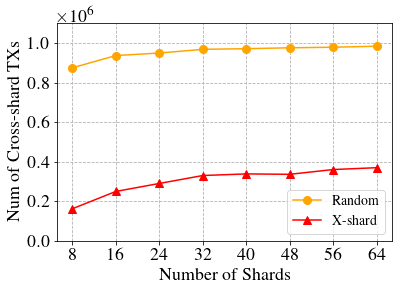

In [21]:
def plot_beta(data,bar_width=2,pic_name=1,save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5):
    colorlist = ['orange','red','grey','black','blue','green']
    markerlist = ['o','^','x','s']
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val-3*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

data = np.genfromtxt('cr-tx.csv', delimiter=',')
data = np.delete(data,0,axis=0)
data = np.transpose(data)
data = data.astype(int)


plot_beta(data=data,pic_name='ncr-nshard',save=True,xlabel="Number of Shards", ylabel=r'Num of Cross-shard TXs',text_location=30000,xlim=1000000,ylim=1100000,labellist=['Random','X-shard','cross-shard tx'])

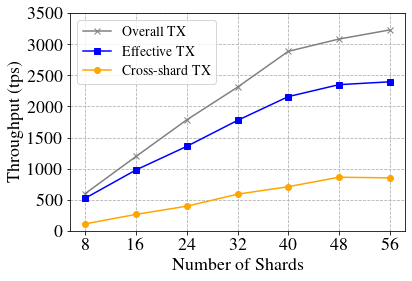

In [22]:
data = np.loadtxt('source/result.txt')
data = np.transpose(data)
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=6)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    leftaxis.set_yticks(np.arange(0,3501,500))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='throughtput',save=True,xlabel="Number of Shards", ylabel="Throughput (tps)",text_location=50,ylim=3500,labellist=['Overall TX','Effective TX','Cross-shard TX'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

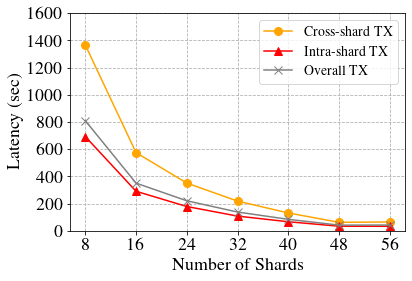

In [24]:
df = pd.read_csv('source/latency.csv')

data = np.transpose(df.to_numpy())
data = data.round(1)


def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.set_yticks(np.arange(0,ylim+1,200))
    # print(x)
    leftaxis.legend(loc=0)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency',save=True,xlabel="Number of Shards", ylabel="Latency (sec)",text_location=30,ylim=1600,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

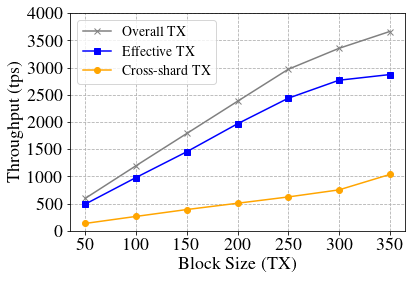

In [27]:
def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.set_yticks(np.arange(0,4001,500))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

data=np.loadtxt('source/blk_size.txt')
data=np.transpose(data)
data=data.round(1)

plot_line_chart(data=data,pic_name='blk_size_throughput',save=True,xlabel="Block Size (TX)", ylabel="Throughput (tps)",text_location=30,ylim=4000,labellist=['Overall TX','Effective TX','Cross-shard TX'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

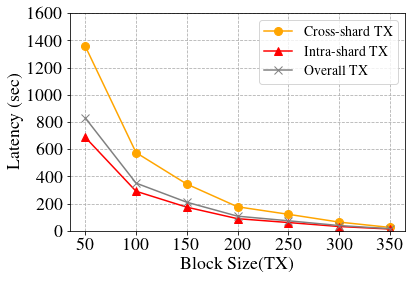

In [37]:
df = pd.read_csv('source/latency_blksize.csv')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         if j<4:
        #             leftaxis.text(x[j], val-4*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #         else:
        #             if j>4:
        #                 leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #             else:
        #                 leftaxis.text(x[j], val+2.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9,})
        #     else:
        #         if j>3:
        #             if j==4:
        #                 if i==0:
        #                     leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #                 else:
        #                     leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #             else:
        #                 leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #         else:
        #             leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.legend(loc=0)
    leftaxis.set_yticks(np.arange(0,ylim+1,200))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-blksize',save=True,xlabel="Block Size(TX)", ylabel="Latency (sec)",text_location=25,ylim=1600,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

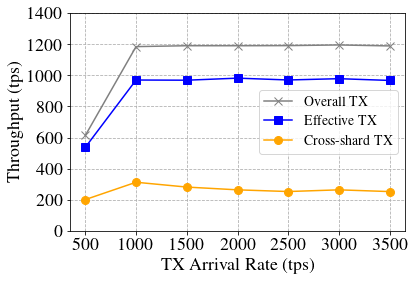

In [36]:
data=(np.transpose(np.loadtxt('source/th_txar.txt'))).round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    leftaxis.set_yticks(np.arange(0,ylim+1,200))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()


plot_line_chart(data=data,pic_name='throughput-txarate',save=True,xlabel="TX Arrival Rate (tps)", ylabel="Throughput (tps)",text_location=30,ylim=1400,labellist=['Overall TX','Effective TX','Cross-shard TX'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

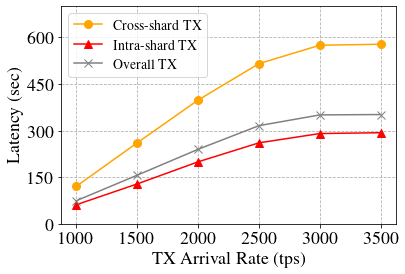

In [41]:
df = pd.read_csv('source/latency_txar.txt')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         if j==0:
        #             leftaxis.text(x[j], val+1*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
        #             # ,'color':'blue'
        #         else:                  
        #             leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         if j==0:
        #             leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
        #             # ,'color':'blue'
        #         else:
        #             leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend()
    leftaxis.set_yticks(np.arange(0,ylim+1,150))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-txar',save=True,xlabel="TX Arrival Rate (tps)", ylabel="Latency (sec)",text_location=12,ylim=700,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

In [20]:
os.system('cd ~/codes/txrate_xshard && git pull')

Updating df814ee..eabe66b
Fast-forward
 main.m      | 36 ++++++++++++++++++++++++++++++++----
 q1.txt      |  8 ++++++++
 queueSize.m |  2 +-
 3 files changed, 41 insertions(+), 5 deletions(-)
 create mode 100644 q1.txt


From https://github.com/wzh4464/txrate_xshard
   389335d..eabe66b  master     -> origin/master


0

In [12]:
data=np.genfromtxt('../txrate_xshard/qtb.txt')
print(data.shape)
# data=np.transpose(data)
simpledata=data[:,::10]
print(simpledata.shape)

(8, 1141)
(8, 115)


In [37]:
def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green','yellow'],markerlist = ['o','^','x','s','v','1','v'],ystep=5000,xstep=500,linewidth=2):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], label=labellist[i],zorder=2,linewidth=linewidth)
        # leftaxis.plot(x, y[i,:])

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_xlim(0, xlim)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(np.arange(0,xlim+1,xstep))
    leftaxis.set_yticks(np.arange(0,ylim+1,ystep))
    plt.rc('legend', fontsize=12)
    lg = leftaxis.legend()
    # set(lg,'font')
    
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()




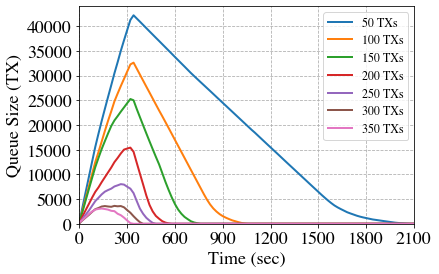

In [39]:

plot_line_chart(data=simpledata,pic_name='qtb',save=True,xlabel="Time (sec)", ylabel="Queue Size (TX)",text_location=12,xlim=2100, ylim=44000,labellist=['50 TXs','100 TXs','150 TXs','200 TXs','250 TXs','300 TXs','350 TXs'],xstep=300)

101355.9


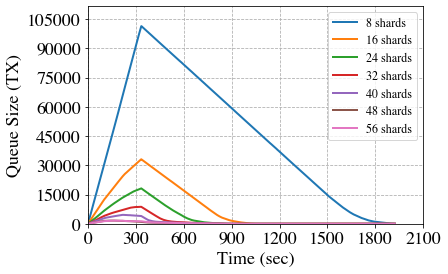

In [40]:
q1data=np.genfromtxt('../txrate_xshard/q1.txt')
print(q1data.max())
plot_line_chart(data=q1data,pic_name='q1',save=True,xlabel="Time (sec)", ylabel="Queue Size (TX)",text_location=12,xlim=2100, ylim=q1data.max()*1.1,labellist=['8 shards','16 shards','24 shards','32 shards','40 shards','48 shards','56 shards'],ystep=15000,xstep=300)